# Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras_metrics
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from sklearn.model_selection import RandomizedSearchCV 

np.random.seed(123)

Using TensorFlow backend.


In [2]:
test_folder = '../data/test'
train_folder = '../data/train'
val_folder = '../data/val'

In [3]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64,64), batch_size = 627) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64,64), batch_size = 19)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64,64), batch_size=5219)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [6]:
train_img.shape

(5216, 12288)

# Model A

In [9]:
modelA = models.Sequential()

modelA.add(layers.Conv2D(6, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
modelA.add(layers.MaxPooling2D((3, 3), strides=3))
modelA.add(layers.Dropout(0.75))  

modelA.add(layers.Conv2D(12, (3, 3), activation='relu'))
modelA.add(layers.MaxPooling2D((3, 3), strides=3))
modelA.add(layers.Dropout(0.05))  


modelA.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
modelA.add(layers.Dense(1, activation='sigmoid'))


# confusion matrx

In [11]:
modelA.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

historyA = modelA.fit(train_images,
                    train_y,
                    epochs=5,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/5
5216/5216 [==============================] - 5s 963us/step - loss: 0.5787 - acc: 0.7389 - recall: 0.0455 - val_loss: 0.7166 - val_acc: 0.5000 - val_recall: 0.0000e+00
Epoch 2/5
5216/5216 [==============================] - 4s 833us/step - loss: 0.4956 - acc: 0.7699 - recall: 0.2289 - val_loss: 0.7005 - val_acc: 0.5000 - val_recall: 0.0000e+00
Epoch 3/5
5216/5216 [==============================] - 4s 832us/step - loss: 0.4098 - acc: 0.8092 - recall: 0.4430 - val_loss: 0.6509 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 4/5
5216/5216 [==============================] - 4s 830us/step - loss: 0.3349 - acc: 0.8593 - recall: 0.6167 - val_loss: 0.6254 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 5/5
5216/5216 [==============================] - 4s 849us/step - loss: 0.3095 - acc: 0.8687 - recall: 0.6682 - val_loss: 0.6105 - val_acc: 0.6250 - val_recall: 0.3750


In [12]:
results_train = modelA.evaluate(train_images, train_y)

5216/5216 [==============================] - 2s 426us/step


In [13]:
results_test = modelA.evaluate(test_images, test_y)

624/624 [==============================] - 0s 444us/step


In [14]:
results_train

[0.51381844794092, 0.8740414110429447, 0.9724086501884855]

In [15]:
results_test

[0.5415784028860239, 0.8557692307692307, 0.8846153842373439]

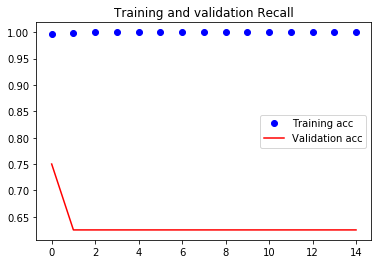

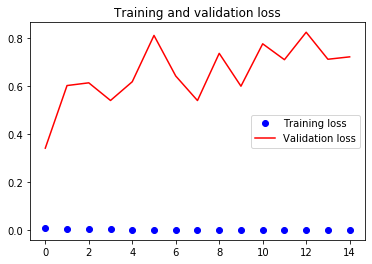

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = historyA.history['recall']
val_rec = historyA.history['val_recall']
loss = historyA.history['loss']
val_loss = historyA.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model B

In [7]:
modelB = models.Sequential()

modelB.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
modelB.add(layers.MaxPooling2D((3, 3)))
modelB.add(layers.Dropout(0.75))  

modelB.add(layers.Conv2D(12, (3, 3), activation='relu'))
modelB.add(layers.MaxPooling2D((3, 3)))
modelB.add(layers.Dropout(0.05))  

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

modelB.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
modelB.add(layers.Dense(1, activation='sigmoid'))


# confusion matrx

In [8]:
modelB.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

historyB = modelB.fit(train_images,
                    train_y,
                    epochs=15,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

NameError: name 'model' is not defined

In [11]:
results_train = modelB.evaluate(train_images, train_y)

5216/5216 [==============================] - 44s 8ms/step


In [12]:
results_test = modelB.evaluate(test_images, test_y)

624/624 [==============================] - 5s 8ms/step


In [13]:
results_train

[0.2532622461304343, 0.9338573619631901, 0.9127516777842839]

In [14]:
results_test

[0.4845580993554531, 0.7852564102564102, 0.5042735040580028]

In [ ]:
results_test

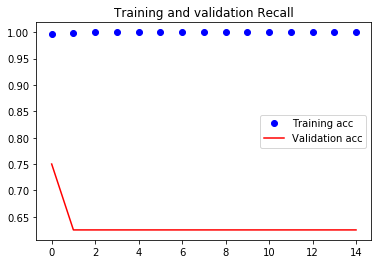

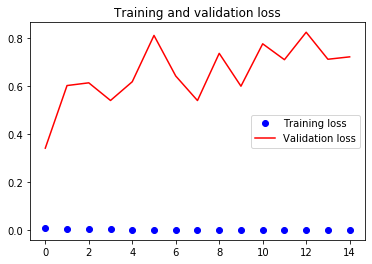

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = historyB.history['recall']
val_rec = historyB.history['val_recall']
loss = historyB.history['loss']
val_loss = historyB.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model C

In [9]:
modelC = models.Sequential()

modelC.add(layers.Conv2D(6, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
modelC.add(layers.MaxPooling2D((3, 3), strides=3))
modelC.add(layers.Dropout(0.75))  

modelC.add(layers.Conv2D(12, (3, 3), activation='relu'))
modelC.add(layers.MaxPooling2D((3, 3), strides=3))
modelC.add(layers.Dropout(0.05))  

modelC.add(layers.Conv2D(18, (3, 3), activation='relu'))
modelC.add(layers.MaxPooling2D((3, 3), strides=3))
modelC.add(layers.Dropout(0.0025)) 

modelC.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
modelC.add(layers.Dense(1, activation='sigmoid'))


# confusion matrx

In [10]:
modelC.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

historyC = model.fit(train_images,
                    train_y,
                    epochs=7,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/7
5216/5216 [==============================] - 6s 1ms/step - loss: 0.5665 - acc: 0.7427 - recall: 0.0000e+00 - val_loss: 0.6913 - val_acc: 0.5625 - val_recall: 0.1250
Epoch 2/7
5216/5216 [==============================] - 5s 912us/step - loss: 0.5481 - acc: 0.7433 - recall: 0.0067 - val_loss: 0.6855 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 3/7
5216/5216 [==============================] - 5s 1ms/step - loss: 0.4857 - acc: 0.7719 - recall: 0.1879 - val_loss: 0.6770 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 4/7
5216/5216 [==============================] - 6s 1ms/step - loss: 0.3933 - acc: 0.8230 - recall: 0.4907 - val_loss: 0.6732 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 5/7
5216/5216 [==============================] - 6s 1ms/step - loss: 0.3458 - acc: 0.8399 - recall: 0.5981 - val_loss: 0.6384 - val_acc: 0.5000 - val_recall: 1.0000
Epoch 6/7
5216/5216 [==============================] - 5s 982us/step - loss: 0.3304 - acc: 0.

In [11]:
results_train = modelC.evaluate(train_images, train_y)

5216/5216 [==============================] - 3s 501us/step


In [15]:
results_test = modelC.evaluate(test_images, test_y)

624/624 [==============================] - 0s 438us/step


In [16]:
results_train

[0.7590040165953841, 0.43059815950920244, 0.9999999999254288]

In [17]:
results_test

[0.7231586835323236, 0.47596153846153844, 0.9999999995726496]

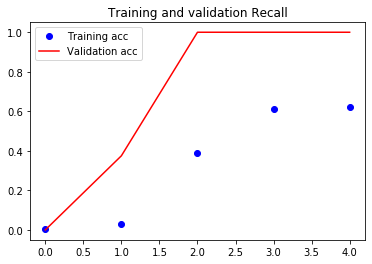

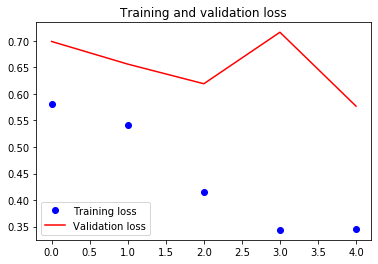

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = historyC.history['recall']
val_rec = historyC.history['val_recall']
loss = historyC.history['loss']
val_loss = historyC.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()